In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
##Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [3]:
#Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


In [8]:
#Reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
#One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
#model
model = Sequential()
#Add Convolutional layer with 32 kernel of size 3x3 each
#Sigmoid as activation and input_shape for first layer 
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
#Add Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
#Add Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add Flatten layer: tensor into vector
model.add(Flatten())
#Add Fully Connected layer with 128 nodes and use sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer
model.add(Dense(10, activation='softmax'))

In [15]:
#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#Train model
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 44s 8ms/step - loss: 0.2925 - accuracy: 0.9193 - val_loss: 0.0677 - val_accuracy: 0.9819
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0602 - accuracy: 0.9822 - val_loss: 0.0542 - val_accuracy: 0.9842
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0401 - val_ac

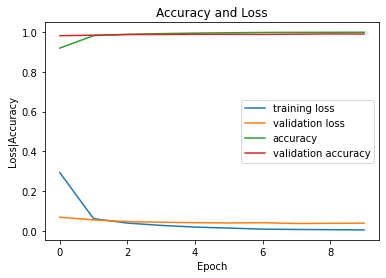

In [19]:
#Plot of loss function, accuracy of traning set and validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [20]:
#Evaluate the model with test dataset
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03357076272368431, 0.9894000291824341]


Prediction:  2


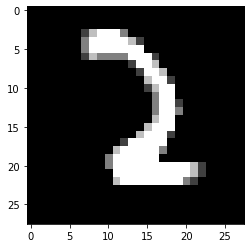

In [31]:
#Prediction
plt.imshow(X_test[236].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[236].reshape(1,28,28,1))
print('Prediction: ', np.argmax(y_predict))